<a href="https://colab.research.google.com/github/skywalker0803r/Wastewater-Biological-Treatment/blob/main/%E6%AF%8F%E4%B8%80%E7%A8%AE%E8%9F%B2%E6%A0%B9%E6%93%9A%E8%87%AA%E5%B7%B1%E7%9A%84%E7%99%BE%E5%88%86%E4%BD%8D%E6%95%B8%E5%81%9A%E5%88%87%E5%88%86%E5%88%86%E6%88%9010%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/drive/MyDrive/廢水案子/ALLdataset.csv',index_col = 0)
df = df.dropna(axis=0)
d = pd.DataFrame()
# 對各日期做採樣100筆
for i in tqdm(df.index.unique()):
  d = d.append(df.loc[df.index==i].sample(100))
df = d
df

  0%|          | 0/279 [00:00<?, ?it/s]

,site,cindex,cName,classification,confidence,D
date,,,,,,
20210927,T753,116,絲狀菌,116_絲狀菌,0.999891,18.245373
20210927,T752,127,滴蟲,127_滴蟲,0.323760,35.309502
20210927,T752,125,膜袋蟲,125_膜袋蟲,0.908253,39.798182
20210927,T752,116,絲狀菌,116_絲狀菌,0.995605,30.820660
20210927,T753,118,尾絲蟲,118_尾絲蟲,0.367803,34.304368
...,...,...,...,...,...,...
20230216,T752,118,尾絲蟲,118_尾絲蟲,0.938807,42.453392
20230216,T752,123,太陽蟲,123_太陽蟲,0.882728,72.719545
20230216,T753,118,尾絲蟲,118_尾絲蟲,0.984006,33.396104


# 針對
1.不同日期
2.不同蟲類
3.不同百分位數

去計算資料筆數

In [39]:
def convert_to_df2(df):
    new_df = pd.DataFrame(index = df.index.unique())
    
    for i in df.cName.unique():
        for j in range(1,11,1):
            new_df[i+str(int(j*10))+'%'] = np.nan
    
    for date in tqdm(new_df.index):
        for cName in df['cName'].unique():
            for q in range(1,11,1):
                q = q*0.1
                d = df.loc[(df.index==date)&(df.cName==cName),['D']]
                d2 = d.loc[(d['D']>d['D'].quantile(q-0.1))&(d['D']<d['D'].quantile(q))]
                new_df.loc[date,cName+str(int(q*100))+'%'] = len(d2)
    
    return new_df
df2 = convert_to_df2(df)
df2

  0%|          | 0/279 [00:00<?, ?it/s]

,絲狀菌10%,絲狀菌20%,絲狀菌30%,絲狀菌40%,絲狀菌50%,絲狀菌60%,絲狀菌70%,絲狀菌80%,絲狀菌90%,絲狀菌100%,...,未定義10%,未定義20%,未定義30%,未定義40%,未定義50%,未定義60%,未定義70%,未定義80%,未定義90%,未定義100%
date,,,,,,,,,,,,,,,,,,,,,
20210927,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20210928,3.0,4.0,3.0,4.0,3.0,3.0,4.0,3.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20210929,3.0,4.0,4.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20210930,2.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20211004,3.0,4.0,2.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230210,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20230213,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20230214,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
df2.describe().std().sort_values().tail(20)

單領鞭毛蟲20%    98.641396
單領鞭毛蟲10%    98.641396
變形蟲210%     98.641396
變形蟲220%     98.641396
變形蟲230%     98.641396
變形蟲240%     98.641396
變形蟲250%     98.641396
變形蟲260%     98.641396
變形蟲270%     98.641396
變形蟲280%     98.641396
變形蟲290%     98.641396
變形蟲2100%    98.641396
斜管蟲100%     98.641396
斜管蟲90%      98.641396
太陽蟲10%      98.641396
單領鞭毛蟲80%    98.641396
太陽蟲100%     98.641396
輪蟲類10%      98.641396
輪蟲類30%      98.641396
螺旋菌60%      98.641396
dtype: float64

# 針對以上資料做分群

X 絲狀菌100% Y膜袋蟲100%


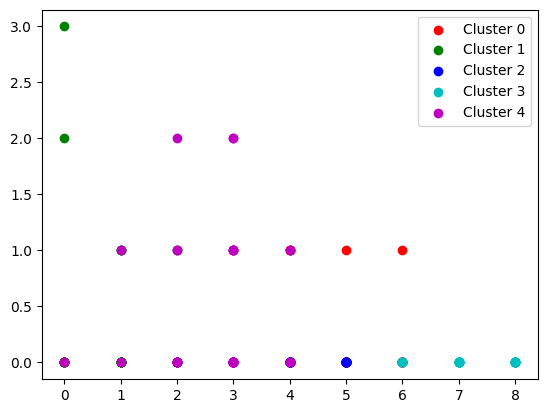

In [44]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 確定要分成的群組數量
k = 5

# 使用K-Means進行分群
kmeans = KMeans(n_clusters=k).fit(df2)

# 將分群的結果加入DataFrame中
df2['cluster'] = kmeans.labels_

# 繪製分群的結果
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for i in range(k):
    cluster_data = df2[df2['cluster'] == i]
    plt.scatter(cluster_data['絲狀菌100%'], cluster_data['膜袋蟲100%'], c=colors[i], label=f'Cluster {i}')
print('X 絲狀菌100% Y膜袋蟲100%')
plt.legend()
plt.show()